# WeRateDogs Analysis

## My goal for this project is to find out: 
### > Most popular dog names
### > Most popular device/platform used to tweet
### > Most favorited tweet


In [24]:
import requests
import pandas as pd
import matplotlib as plt
import seaborn as sb
%matplotlib inline

In [84]:
#load twitter-archive-enhanced
archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'unicode_escape')
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2467 non-null   object 
 1   in_reply_to_status_id       94 non-null     object 
 2   in_reply_to_user_id         94 non-null     object 
 3   timestamp                   2372 non-null   object 
 4   source                      2447 non-null   object 
 5   text                        2451 non-null   object 
 6   retweeted_status_id         261 non-null    float64
 7   retweeted_status_user_id    261 non-null    object 
 8   retweeted_status_timestamp  261 non-null    object 
 9   expanded_urls               2302 non-null   object 
 10  rating_numerator            2356 non-null   object 
 11  rating_denominator          2356 non-null   object 
 12  name                        2261 non-null   object 
 13  doggo                       2261 

In [85]:
#making a copy of archive df
archive_copy=archive.copy()

In [22]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [86]:
import tweepy
from tweepy import OAuthHandler
import json

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = '0kd2CvKwRlLjqeDw0NDpayvc5'
consumer_secret = '2gJ6zyToGZe6zTF5lcognal3ZsrFNAjRjD0vZD3aY3uD7a2NMM'
access_token = '1318529182687690754-X5m9G4tbQgnnBtmcx0aTax9At16r2z'
access_secret = '2KyQE43j4aYshVAUVk7ST92kiDGJDTGM7NcGC7ET7NMDI'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode= 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: nan
Fail
9: https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl"
Fail
10: 890729181411237888
Success
11: 890609185150312448
Success
12: 890240255349198849
Success
13: 890006608113172480
Success
14: 889880896479866881
Success
15: 889665388333682689
Success
16: 889638837579907072
Success
17: 889531135344209921
Success
18: 889278841981685760
Success
19: 888917238123831296
Success
20: 888804989199671297
Success
21: 888554962724278272
Success
22: 888202515573088257
Fail
23: 888078434458587136
Success
24: 887705289381826560
Success
25: 887517139158093824
Success
26: 887473957103951883
Success
27: 887343217045368832
Success
28: 887101392804085760
Success
29: 886983233522544640
Success
30: 886736880519319552
Success
31: nan
Fail
32: https://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b"
Fail
33

Success
260: 849051919805034497
Success
261: 848690551926992896
Success
262: 848324959059550208
Success
263: 848213670039564288
Success
264: 848212111729840128
Success
265: 847978865427394560
Success
266: 847971574464610304
Success
267: 847962785489326080
Success
268: 847842811428974592
Success
269: nan
Fail
270: https://t.co/zK4cpKPFfU https://t.co/7Xvoalr798"
Fail
271: 847617282490613760
Success
272: 847606175596138505
Success
273: 847251039262605312
Success
274: 847157206088847362
Success
275: nan
Fail
276: https://t.co/Jlb9L0m3J0 https://t.co/Eh7fGFuy6r"
Fail
277: 847116187444137987
Success
278: 846874817362120707
Success
279: 846514051647705089
Success
280: 846505985330044928
Success
281: 846153765933735936
Success
282: 846139713627017216
Success
283: 846042936437604353
Success
284: 845812042753855489
Success
285: 845677943972139009
Success
286: 845459076796616705
Fail
287: 845397057150107648
Success
288: nan
Fail
289: https://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o"
Fail
290: 845

Success
517: 819238181065359361
Success
518: https://t.co/MefMAZX2uv"
Fail
519: 819227688460238848
Success
520: 819015337530290176
Success
521: 819015331746349057
Success
522: 819006400881917954
Success
523: 819004803107983360
Success
524: 818646164899774465
Success
525: 818627210458333184
Success
526: 818614493328580609
Success
527: 818588835076603904
Success
528: 818536468981415936
Success
529: 818307523543449600
Success
530: 818259473185828864
Success
531: 818145370475810820
Success
532: 817908911860748288
Success
533: https://t.co/bbuKxk0fM8"
Fail
534: 817827839487737858
Success
535: 817777686764523521
Success
536: 817536400337801217
Success
537: 817502432452313088
Success
538: 817423860136083457
Success
539: 817415592588222464
Success
540: nan
Fail
541: https://t.co/3uxgLz8d0l https://t.co/O0ECL1StB2"
Fail
542: 817181837579653120
Success
543: 817171292965273600
Success
544: 817120970343411712
Success
545: 817056546584727552
Success
546: 816829038950027264
Success
547: 816816676327

Success
770: 789137962068021249
Success
771: 788908386943430656
Success
772: 788765914992902144
Success
773: 788552643979468800
Success
774: 788412144018661376
Success
775: 788178268662984705
Success
776: 788150585577050112
Success
777: 788070120937619456
Success
778: 788039637453406209
Success
779: 787810552592695296
Success
780: 787717603741622272
Success
781: 787397959788929025
Success
782: 787322443945877504
Success
783: 787111942498508800
Success
784: 786963064373534720
Success
785: 786729988674449408
Success
786: 786709082849828864
Success
787: 786664955043049472
Success
788: 786595970293370880
Success
789: 786363235746385920
Success
790: 786286427768250368
Success
791: 786233965241827333
Success
792: 786051337297522688
Success
793: 786036967502913536
Success
794: 785927819176054784
Success
795: 785872687017132033
Success
796: 785639753186217984
Success
797: 785533386513321988
Success
798: 785515384317313025
Success
799: 785264754247995392
Success
800: 785170936622350336
Success


Success
1027: 755110668769038337
Success
1028: 754874841593970688
Success
1029: 754856583969079297
Success
1030: 754747087846248448
Success
1031: 754482103782404096
Success
1032: 754449512966619136
Success
1033: 754120377874386944
Success
1034: 754011816964026368
Fail
1035: 753655901052166144
Success
1036: 753420520834629632
Success
1037: 753398408988139520
Success
1038: 753375668877008896
Success
1039: 753298634498793472
Success
1040: 753294487569522689
Success
1041: 753039830821511168
Success
1042: 753026973505581056
Success
1043: 752932432744185856
Success
1044: 752917284578922496
Success
1045: 752701944171524096
Success
1046: 752682090207055872
Success
1047: 752660715232722944
Success
1048: *wiggle*
Fail
1049: *wiggle*
Fail
1050: Doggo broke free 
Fail
1051: 10/10 https://t.co/bWSgqnwSHr"
Fail
1052: 752568224206688256
Success
1053: 752519690950500352
Success
1054: 752334515931054080
Success
1055: 752309394570878976
Success
1056: 752173152931807232
Success
1057: 751950017322246144
S

Success
1275: 723673163800948736
Success
1276: 723179728551723008
Success
1277: 722974582966214656
Success
1278: 722613351520608256
Success
1279: 721503162398597120
Success
1280: 721001180231503872
Success
1281: 720785406564900865
Success
1282: 720775346191278080
Success
1283: 720415127506415616
Success
1284: 720389942216527872
Success
1285: 720340705894408192
Success
1286: 720059472081784833
Success
1287: 720043174954147842
Success
1288: 719991154352222208
Success
1289: 719704490224398336
Success
1290: 719551379208073216
Success
1291: 719367763014393856
Success
1292: 719339463458033665
Success
1293: 719332531645071360
Success
1294: 718971898235854848
Success
1295: 718939241951195136
Success
1296: 718631497683582976
Success
1297: 718613305783398402
Success
1298: 718540630683709445
Success
1299: 718460005985447936
Success
1300: 718454725339934721
Success
1301: 718246886998687744
Success
1302: 718234618122661888
Success
1303: 717841801130979328
Success
1304: 717790033953034240
Success
13

Success
1520: 699801817392291840
Success
1521: 699788877217865730
Success
1522: 699779630832685056
Success
1523: 699775878809702401
Success
1524: 699691744225525762
Success
1525: 699446877801091073
Success
1526: 699434518667751424
Success
1527: 699423671849451520
Success
1528: 699413908797464576
Success
1529: 699370870310113280
Success
1530: 699323444782047232
Success
1531: 699088579889332224
Success
1532: 699079609774645248
Success
1533: 699072405256409088
Success
1534: 699060279947165696
Success
1535: 699036661657767936
Success
1536: 698989035503689728
Success
1537: 698953797952008193
Success
1538: 698907974262222848
Success
1539: 698710712454139905
Success
1540: 698703483621523456
Success
1541: 698635131305795584
Success
1542: 698549713696649216
Success
1543: 698355670425473025
Success
1544: 698342080612007937
Success
1545: 698262614669991936
Success
1546: 698195409219559425
Success
1547: 698178924120031232
Success
1548: 697995514407682048
Success
1549: 697990423684476929
Success
15

Success
1767: 684241637099323392
Success
1768: 684225744407494656
Success
1769: 684222868335505415
Success
1770: 684200372118904832
Success
1771: 684195085588783105
Success
1772: 684188786104872960
Success
1773: Ok make sure to get this rad hole I just dug in there""
Fail
1774: nan
Fail
1775: Both 10/10 https://t.co/e0gbl9VFpA"
Fail
1776: 684177701129875456
Success
1777: 684147889187209216
Success
1778: 684122891630342144
Success
1779: 684097758874210310
Success
1780: 683857920510050305
Success
1781: 683852578183077888
Success
1782: 683849932751646720
Success
1783: 683834909291606017
Success
1784: 683828599284170753
Success
1785: 683773439333797890
Success
1786: 683742671509258241
Success
1787: 683515932363329536
Success
1788: 683498322573824003
Success
1789: 683481228088049664
Success
1790: 683462770029932544
Success
1791: 683449695444799489
Success
1792: 683391852557561860
Success
1793: 683357973142474752
Success
1794: 683142553609318400
Success
1795: 683111407806746624
Success
1796:

Success
2012: 675149409102012420
Success
2013: 675147105808306176
Success
2014: 675146535592706048
Success
2015: 675145476954566656
Success
2016: 675135153782571009
Success
2017: 675113801096802304
Success
2018: 675111688094527488
Success
2019: 675109292475830276
Success
2020: 675047298674663426
Success
2021: 675015141583413248
Success
2022: 675006312288268288
Success
2023: 675003128568291329
Success
2024: 674999807681908736
Success
2025: 674805413498527744
Success
2026: 10/10 https://t.co/vqFkgYPCW8"
Fail
2027: 674800520222154752
Success
2028: 674793399141146624
Success
2029: 674790488185167872
Success
2030: 674788554665512960
Success
2031: 674781762103414784
Success
2032: 674774481756377088
Success
2033: 674767892831932416
Success
2034: 674764817387900928
Success
2035: 674754018082705410
Success
2036: 674752233200820224
Success
2037: 674743008475090944
Success
2038: 674742531037511680
Success
2039: 674739953134403584
Success
2040: 11/10 https://t.co/URNs5zFskc"
Fail
2041: 67473713091

Success
2259: 670449342516494336
Success
2260: 670444955656130560
Success
2261: 670442337873600512
Success
2262: 670435821946826752
Success
2263: 670434127938719744
Success
2264: 670433248821026816
Success
2265: 670428280563085312
Success
2266: 670427002554466305
Success
2267: 670421925039075328
Success
2268: 670420569653809152
Success
2269: 670417414769758208
Success
2270: 670411370698022913
Success
2271: 670408998013820928
Success
2272: 670403879788544000
Success
2273: 670385711116361728
Success
2274: 670374371102445568
Success
2275: 670361874861563904
Success
2276: 670338931251150849
Success
2277: 670319130621435904
Success
2278: WE RIDE
Fail
2279: nan
Fail
2280: 11/10 https://t.co/QnfO7HEQGA"
Fail
2281: 670303360680108032
Success
2282: 670290420111441920
Success
2283: 670093938074779648
Success
2284: 670086499208155136
Success
2285: 10/10 https://t.co/DuQXATW27f"
Fail
2286: 670079681849372674
Success
2287: 670073503555706880
Success
2288: 670069087419133954
Success
2289: 6700615067

Success
2506: 666071193221509120
Success
2507: 666063827256086533
Success
2508: 666058600524156928
Success
2509: 666057090499244032
Success
2510: 666055525042405380
Success
2511: 666051853826850816
Success
2512: 666050758794694657
Success
2513: 666049248165822465
Success
2514: 666044226329800704
Success
2515: 666033412701032449
Success
2516: 666029285002620928
Success
2517: 666020888022790149
Success
{nan: TweepError([{'code': 8, 'message': 'No data available for specified ID.'}]), 'https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl"': TweepError([{'code': 8, 'message': 'No data available for specified ID.'}]), '888202515573088257': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 'https://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b"': TweepError([{'code': 8, 'message': 'No data available for specified ID.'}]), '(IG: puffie_the_chow) https://t.co/ghXBIIeQZF"': TweepError([{'code': 8, 'message': 'No data available for specified ID.'}]), 'https:/?Çª"': TweepError([{'code

In [87]:
#find the tweet ids that failed to load
delete = ['']
for tweet_id in fails_dict:
    if fails_dict.get(tweet_id == 'Fail'):
        delete.append(tweet_id)
        print(delete)

In [88]:
#load twitter api data into df 
ratings=pd.read_json('tweet_json.txt', lines=True)
ratings.head(3)

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorited  retweeted  possibly_sensitive  \
0  ...      False      False                 0.0   
1  ...      False      False                 0.0   
2  ...      False      False                 0.0   

  possibly_sensitive_appealable lang  retweeted_status  quoted_status_id  \
0                           0.0   en               NaN               NaN   
1                           0.0   en               NaN               NaN   
2                           0.0   en               NaN               NaN   

  quoted_status_id_str  quoted_status_permalink  quoted_status  
0                  NaN                      NaN            NaN  
1                  NaN                      NaN            NaN  
2                  NaN                      NaN            NaN  

[3 rows x 32 columns]

In [89]:
#make copy of ratings df
ratings_copy = ratings.copy()

In [90]:
#load image predictions data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [91]:
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [93]:
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
48    666826780179869698    https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIA

In [94]:
#make a copy of images df
images_copy = images.copy()

# Assessing the data:
### I'll be assessing the three pieces of data in this section

#### Looking at the archive dataframe:

In [95]:
#get info for each column
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2467 non-null   object 
 1   in_reply_to_status_id       94 non-null     object 
 2   in_reply_to_user_id         94 non-null     object 
 3   timestamp                   2372 non-null   object 
 4   source                      2447 non-null   object 
 5   text                        2451 non-null   object 
 6   retweeted_status_id         261 non-null    float64
 7   retweeted_status_user_id    261 non-null    object 
 8   retweeted_status_timestamp  261 non-null    object 
 9   expanded_urls               2302 non-null   object 
 10  rating_numerator            2356 non-null   object 
 11  rating_denominator          2356 non-null   object 
 12  name                        2261 non-null   object 
 13  doggo                       2261 

> Quality Issue #1: There are retweets that need to be removed

> Quality Issue #2: There are unnecessary columns. 

In [96]:
#checking if there are any duplicates
archive_d = archive.duplicated()
archive_d.value_counts()

False    2465
True       52
dtype: int64

> There are 52 duplicates in this dataset

> Tidyness Issue #1: The last 4 columns can be merged into one to identify life stage each dog is at.

In [98]:
#looking at the dog names
archive.name.value_counts()

None              695
a                  53
Charlie            12
Lucy               11
Tucker             10
Penny              10
Bo                  9
Cooper              9
Oliver              9
Winston             9
Sadie               8
the                 8
Lola                8
Buddy               7
Toby                7
Bailey              7
an                  7
Rusty               6
Stanley             6
Dave                6
Oscar               6
Milo                6
Scout               6
Koda                6
Leo                 6
Daisy               6
Jax                 5
Larry               5
George              5
Oakley              5
Sammy               5
Gus                 5
Bentley             5
Phil                5
Bella               5
Sunny               5
Chester             5
Alfie               5
very                5
Finn                5
Louis               5
Clarence            4
Sampson             4
Archie              4
Luna                4
Hank      

> Quality Issue #3: The most popular names is "None", followed by "a" which I doubt are actual names given to these dogs.

#### Looking at the Ratings dataframe:

In [99]:
#general overview
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

> Quality Issue #4:This dataset has multiple columns with missing data which need to be removed. 

> Quality Issue #5:There are numerous columns that are unneccesary to the analysis

In [100]:
#rename "id" to "tweet_id"
ratings=ratings.rename(columns = {'id':'tweet_id'})
ratings

created_at            tweet_id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2326 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2327 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2328 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2329 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2330 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2326  Here we have a 1949 1st generation vulpix. Enj...      False   
2327  This is a purebred Piers Morgan. Loves to Netf...      False   
2328  Here is a very happy pup. Big fan of well-main...      False   
2329  This is a western brown Mitsubishi terrier. Up...      False   
2330  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2326           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2327           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2328           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2329           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2330           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2326  {'media': [{'id': 666049244999131136, 'id_str'...   
2327  {'media': [{'id': 666044217047650304, 'id_str'...   
2328  {'media': [{'id': 666033409081393153, 'id_str'...   
2329  {'media': [{'id': 666029276303482880, 'id_str'...   
2330  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2326  <a href="http://twitter.com/download/iphone" r...   
2327  <a href="http://twitter.com/download/iphone" r...   
2328  <a href="http://twitter.com/download/iphone" r...   
2329  <a href="http://twitter.com/download/iphone" r..

In [101]:
#checking the source column
ratings.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

> Quality Issue #6: There are only 4 tweet sources so they can be renamed for easy viewing and analysis

In [102]:
#checking to see the time range of tweets
ratings.created_at.describe(datetime_is_numeric=True)

count                                   2331
mean     2016-06-12 08:19:56.871298816+00:00
min                2015-11-15 22:32:08+00:00
25%         2015-12-19 17:33:54.500000+00:00
50%                2016-04-08 01:19:36+00:00
75%                2016-11-15 23:29:21+00:00
max                2017-08-01 16:23:56+00:00
Name: created_at, dtype: object

> Quality Issue #7: It was advised to not have tweets beyond August 1, 2017, because I wouldn't be able to gather image predictions, since I don't have access to the algorithm used. 

In [103]:
#another method to check for duplicates:
columns = ['created_at', 'id','id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source','in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo', 'coordinates', 'place','contributors', 'is_quote_status','retweet_count', 'favorite_count', 'favorited','retweeted', 'possibly_sensitive','possibly_sensitive_appealable', 'lang','retweeted_status','quoted_status_id',                 
'quoted_status_id_str','quoted_status_permalink','quoted_status']

for i in columns:
    if columns.count(i) > 1:
        print('Duplicates')
    else:
        print('No duplicates')

No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates
No duplicates


> No duplicates were found in the ratings dataframe 

#### Looking at the images dataframe: 

In [45]:
#looking at data
images.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [104]:
#general overview
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


> Tidy issue #2: The only prediction that I need it the first one since it has the highest confidence values.

> There are no null values

In [105]:
#check for duplicates
image_d = images.duplicated()
image_d.value_counts()

False    2075
dtype: int64

> No duplicates were found in the images dataframe

In [106]:
#changing max rows displayed to show all in series
pd.set_option('max_rows', 2075)

In [107]:
#looking at all the dog names
images.p1

0               Welsh_springer_spaniel
1                              redbone
2                      German_shepherd
3                  Rhodesian_ridgeback
4                   miniature_pinscher
5                 Bernese_mountain_dog
6                           box_turtle
7                                 chow
8                        shopping_cart
9                     miniature_poodle
10                    golden_retriever
11                       Gordon_setter
12                        Walker_hound
13                                 pug
14                          bloodhound
15                               Lhasa
16                      English_setter
17                                 hen
18                    desktop_computer
19                   Italian_greyhound
20                         Maltese_dog
21                    three-toed_sloth
22                                  ox
23                    golden_retriever
24                            malamute
25                       

> Quality Issue #8: After having a look at all the predictions I can spot quite a few that are not dogs, e.g: 'paper_towel', 'tricycle', 'orange', etc. 

# Cleaning the Issues

#### Archive: 

In [108]:
archive.head(5)

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0  892420643555336193                   NaN                 NaN   
1  892177421306343426                   NaN                 NaN   
2  891815181378084864                   NaN                 NaN   
3  891689557279858688                   NaN                 NaN   
4  891327558926688256                   NaN                 NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

  retweeted_status_user_id retweeted_status_timestamp  \
0                      NaN                        NaN   
1                      NaN                        NaN   
2                      NaN                        NaN   
3                      NaN                        NaN   
4                      NaN                        NaN   

                                       expanded_urls rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...               13   
1  https://twitter.com/dog_rates/status/892177421...               13   
2  https://twitter.com/dog_rates/status/891815181...               12   
3  https://twitter.com/dog_rates/status/891689557...               13   
4  https://twitter.com/dog_rates/status/891327558...               12   

  rating_denominator      name doggo floofer pupper puppo  
0                 10   Phineas  None    None   None  None  
1                 10     Tilly  None    None   None  None  
2                 10    Archie  None    None   None  None  
3                 10     Darla  None    None   None  None  
4                 10  Franklin  None    None   None  None

> Quality Issue #1: There are retweets. 

#### Assess

In [109]:
retweets = archive.query('retweeted_status_id != "NaN"').index
retweets

Int64Index([   8,   21,   31,   36,   40,   61,   73,   80,   81,   84,
            ...
            2243, 2279, 2284, 2309, 2344, 2407, 2416, 2417, 2422, 2482],
           dtype='int64', length=261)

#### Code

In [117]:
#removing retweets
archive = archive.drop(retweets)
archive

KeyError: '[   8   21   31   36   40   61   73   80   81   84   87  100  104  108\n  111  114  115  123  130  134  142  146  150  152  157  168  174  179\n  185  186  189  193  199  207  210  212  215  224  225  236  239  245\n  246  256  264  265  269  275  285  288  290  300  304  308  316  317\n  322  327  331  332  335  344  348  349  353  357  358  362  369  377\n  382  386  391  392  394  397  404  412  415  416  423  439  443  449\n  457  460  461  468  473  477  482  484  487  493  498  499  502  507\n  511  517  519  520  523  526  528  532  536  540  541  545  553  554\n  557  559  565  568  586  589  599  605  613  618  621  624  626  629\n  635  636  639  642  645  650  656  662  665  669  671  674  677  682\n  683  684  685  686  687  688  689  690  691  692  693  694  700  703\n  706  709  716  718  723  743  744  745  750  753  758  760  766  767\n  772  776  782  784  792  810  818  831  836  839  843  847  849  854\n  859  862  865  868  873  879  889  895  896  904  908  912  915  919\n  923  926  930  938  944  957  965  969  982  987  991  996 1009 1012\n 1027 1038 1044 1050 1054 1073 1118 1125 1130 1148 1151 1236 1240 1265\n 1312 1335 1353 1357 1359 1378 1385 1396 1447 1469 1560 1605 1620 1635\n 1656 1740 1774 1802 1811 1833 1909 2025 2039 2058 2063 2221 2240 2243\n 2279 2284 2309 2344 2407 2416 2417 2422 2482] not found in axis'

#### Test

In [111]:
archive.query('retweeted_status_id !="NaN"').count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

> Quality Issue #2:This dataset has multiple columns that are unnecessary for analysis

In [112]:
archive

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0     892420643555336193                   NaN                 NaN   
1     892177421306343426                   NaN                 NaN   
2     891815181378084864                   NaN                 NaN   
3     891689557279858688                   NaN                 NaN   
4     891327558926688256                   NaN                 NaN   
...                  ...                   ...                 ...   
2512  666049248165822465                   NaN                 NaN   
2513  666044226329800704                   NaN                 NaN   
2514  666033412701032449                   NaN                 NaN   
2515  666029285002620928                   NaN                 NaN   
2516  666020888022790149                   NaN                 NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2512  2015-11-16 00:24:50 +0000   
2513  2015-11-16 00:04:52 +0000   
2514  2015-11-15 23:21:54 +0000   
2515  2015-11-15 23:05:30 +0000   
2516  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2512  <a href="http://twitter.com/download/iphone" r...   
2513  <a href="http://twitter.com/download/iphone" r...   
2514  <a href="http://twitter.com/download/iphone" r...   
2515  <a href="http://twitter.com/download/iphone" r...   
2516  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2512  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2513  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2514  Here is a very happy pup. Big fan of well-main...                  NaN   
2515  This is a western brown Mitsubishi terrier. Up...                  NaN   
2516  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   
...                       ...                        ...   
2512                      NaN                        NaN   
2513                      NaN                        NaN   
2514                      NaN                        NaN   
2515                      NaN                        NaN   
2516                      NaN                        NaN   

                                          expanded_urls rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...               13   
1     https://twitter.com/dog_rates/status/892177421...               13   
2     https://twitter.com/dog_rates/status/891815181...               12   
3     https://twitter.com/dog_rates/status/891689557...    

In [113]:
#removing columns with mainly null values 
archive_clean = archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], inplace=True, axis=1)

In [116]:
archive

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2512  666049248165822465  2015-11-16 00:24:50 +0000   
2513  666044226329800704  2015-11-16 00:04:52 +0000   
2514  666033412701032449  2015-11-15 23:21:54 +0000   
2515  666029285002620928  2015-11-15 23:05:30 +0000   
2516  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2512  <a href="http://twitter.com/download/iphone" r...   
2513  <a href="http://twitter.com/download/iphone" r...   
2514  <a href="http://twitter.com/download/iphone" r...   
2515  <a href="http://twitter.com/download/iphone" r...   
2516  <a href="http://twitter.com/download/iphone" r...   

                                                   text rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...               13   
1     This is Tilly. She's just checking pup on you....               13   
2     This is Archie. He is a rare Norwegian Pouncin...               12   
3     This is Darla. She commenced a snooze mid meal...               13   
4     This is Franklin. He would like you to stop ca...               12   
...                                                 ...              ...   
2512  Here we have a 1949 1st generation vulpix. Enj...                5   
2513  This is a purebred Piers Morgan. Loves to Netf...                6   
2514  Here is a very happy pup. Big fan of well-main...                9   
2515  This is a western brown Mitsubishi terrier. Up...                7   
2516  Here we have a Japanese Irish Setter. Lost eye...                8   

     rating_denominator      name doggo floofer pupper puppo  
0                    10   Phineas  None    None   None  None  
1                    10     Tilly  None    None   None  None  
2                    10    Archie  None    None   None  None  
3                    10     Darla  None    None   None  None  
4                    10  Franklin  None    None   None  None  
...                 ...       ...   ...     ...    ...   ...  
2512                 10      None  None    None   None  None  
2513                 10         a  None    None   None  None  
2514                 10         a  None    None   None  None  
2515                 10         a  None    None   None  None  
2516                 10      None  None    None   None  None  

[2256 rows x 11 columns]

> Quality Issue #3: The most popular names are "None" followed by "a", which I doubt are the actual names given to these dogs.

I believe that while gathering the names from the tweets, some of the strings were either cut off or incorrectly identified as 'None' so they need to be removed.

In [118]:
#removing false names from column
df = archive.query('name == "None"').index
print(df)

Int64Index([   5,    9,   14,   26,   27,   34,   39,   41,   45,   46,
            ...
            2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2512, 2516],
           dtype='int64', length=635)


In [120]:
#drop "None"
archive = archive.drop(df)
archive

KeyError: '[   5    9   14   26   27   34   39   41   45   46   51   59   64   67\n   69   77   92   97   98  102  105  112  117  124  126  127  143  147\n  151  153  161  170  171  178  181  192  196  198  200  209  214  216\n  218  219  220  221  222  229  230  232  247  252  255  258  260  262\n  270  276  279  281  283  284  291  296  310  311  318  319  323  329\n  336  337  339  352  363  364  365  368  373  384  393  399  407  419\n  432  444  447  453  464  466  471  475  478  481  489  491  495  503\n  512  543  558  562  573  574  577  578  579  594  604  606  610  614\n  620  622  640  649  658  660  664  668  673  696  699  704  710  713\n  728  736  746  747  774  777  786  791  797  820  822  823  825  826\n  830  838  840  842  845  853  857  861  869  872  876  883  893  899\n  911  936  940  954  963  966  967  978  983  984 1000 1003 1006 1007\n 1013 1014 1015 1020 1021 1022 1023 1024 1032 1034 1035 1040 1045 1051\n 1052 1053 1061 1063 1065 1074 1079 1088 1096 1101 1102 1104 1105 1106\n 1107 1111 1114 1115 1116 1121 1122 1126 1129 1146 1150 1159 1161 1166\n 1173 1176 1177 1183 1185 1187 1188 1190 1192 1193 1198 1199 1201 1206\n 1208 1210 1214 1216 1219 1221 1224 1242 1251 1252 1253 1254 1256 1260\n 1267 1276 1282 1287 1295 1297 1299 1303 1316 1329 1332 1337 1338 1341\n 1343 1347 1354 1362 1363 1365 1366 1371 1372 1381 1386 1401 1408 1412\n 1415 1417 1420 1421 1423 1426 1428 1435 1439 1441 1443 1444 1453 1454\n 1462 1464 1466 1467 1473 1476 1477 1480 1481 1484 1494 1495 1496 1500\n 1504 1514 1515 1521 1525 1526 1529 1532 1534 1537 1540 1547 1551 1552\n 1553 1557 1564 1565 1570 1571 1572 1574 1575 1577 1579 1584 1586 1589\n 1591 1593 1596 1598 1599 1601 1602 1609 1612 1614 1616 1618 1624 1628\n 1632 1637 1640 1642 1643 1644 1645 1646 1652 1662 1663 1665 1666 1673\n 1674 1676 1681 1683 1685 1688 1691 1695 1697 1699 1705 1710 1714 1715\n 1717 1718 1719 1723 1726 1727 1729 1730 1731 1736 1742 1743 1744 1746\n 1751 1755 1757 1758 1760 1761 1763 1767 1768 1769 1777 1782 1783 1786\n 1789 1790 1792 1795 1796 1799 1804 1806 1807 1815 1817 1819 1823 1825\n 1828 1837 1839 1846 1847 1852 1854 1857 1858 1863 1869 1872 1874 1878\n 1883 1885 1889 1891 1893 1900 1901 1903 1906 1907 1911 1913 1915 1918\n 1919 1920 1923 1924 1925 1928 1929 1930 1932 1933 1940 1942 1945 1946\n 1947 1948 1949 1951 1952 1954 1955 1957 1959 1960 1963 1964 1966 1967\n 1969 1973 1975 1977 1978 1979 1981 1982 1983 1984 1985 1987 1988 1991\n 1993 1998 1999 2001 2002 2003 2004 2006 2007 2008 2010 2011 2012 2014\n 2023 2027 2028 2030 2032 2033 2034 2035 2037 2044 2045 2046 2047 2048\n 2050 2073 2074 2077 2080 2083 2084 2085 2087 2088 2092 2094 2103 2104\n 2105 2108 2111 2114 2117 2123 2124 2131 2136 2142 2144 2151 2153 2155\n 2158 2163 2174 2176 2178 2181 2183 2185 2189 2199 2201 2205 2207 2210\n 2212 2213 2215 2218 2223 2226 2228 2233 2236 2238 2248 2254 2256 2257\n 2258 2261 2268 2291 2292 2295 2298 2302 2311 2320 2326 2331 2332 2335\n 2338 2340 2356 2357 2369 2370 2375 2378 2379 2382 2386 2387 2391 2392\n 2394 2397 2402 2409 2410 2411 2415 2418 2425 2427 2430 2434 2435 2436\n 2439 2442 2443 2446 2452 2456 2457 2459 2463 2464 2465 2468 2474 2478\n 2483 2484 2485 2489 2490 2491 2492 2493 2497 2498 2499 2500 2501 2502\n 2503 2504 2505 2512 2516] not found in axis'

In [123]:
#removing false names
df2 = archive.query('name == "a"').index

In [124]:
#drop "a"
archive = archive.drop(df2)

In [125]:
archive.name.value_counts()

Lucy              11
Charlie           11
Penny              9
Cooper             9
Tucker             9
Oliver             9
Winston            8
Sadie              8
the                8
Lola               7
Toby               7
Bailey             6
an                 6
Koda               6
Stanley            6
Daisy              6
Oscar              6
Bo                 6
Chester            5
Bentley            5
Dave               5
Buddy              5
Jax                5
Rusty              5
Leo                5
Milo               5
Bella              5
Scout              5
Louis              5
Winnie             4
Archie             4
Sophie             4
Jerry              4
Dexter             4
Clarence           4
Boomer             4
Chip               4
Derek              4
Maggie             4
Clark              4
Cassie             4
one                4
Sammy              4
Bear               4
Gary               4
very               4
Reggie             4
Alfie        

> Tidyness Issue #1: The last 4 columns can be merged into one to identify life stage each dog is at.

In [126]:
#merging last 4 columns into one called 'stage'
archive['dog_type'] = archive.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

In [127]:
#drop doggo, floofer, pupper, puppo
archive_clean = archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
archive_clean

tweet_id  \
0                                    892420643555336193   
1                                    892177421306343426   
2                                    891815181378084864   
3                                    891689557279858688   
4                                    891327558926688256   
6                                    890971913173991426   
7                                                   NaN   
10                                   890609185150312448   
11                                   890240255349198849   
12                                   890006608113172480   
13                                   889880896479866881   
15                                   889638837579907072   
16                                   889531135344209921   
17                                   889278841981685760   
18                                   888917238123831296   
19                                   888804989199671297   
20                                   888554962724278272   
22                                   888078434458587136   
23                                   887705289381826560   
24                                   887517139158093824   
25                                   887473957103951883   
28                                   886983233522544640   
29                                   886736880519319552   
30                                                  NaN   
32                                   886680336477933568   
33                                   886366144734445568   
35                                   886258384151887873   
37                                   885984800019947520   
38                                   885528943205470208   
42                                   884925521741709313   
43                                   884876753390489601   
44                                   884562892145688576   
47                                   884162670584377345   
48                                   883838122936631299   
49                                   883482846933004288   
50                                   883360690899218434   
52                                   882992080364220416   
53                                   882762694511734784   
54                                   882627270321602560   
55                                   882268110199369728   
56                                   882045870035918850   
57                                   881906580714921986   
58                                   881666595344535552   
60                                   881536004380872706   
62                                   881268444196462592   
63                                   880935762899988482   
65                                   880465832366813184   
66                                   880221127280381952   
68                                   879862464715927552   
70                                   879492040517615616   
71                                   879415818425184262   
72                                   879376492567855104   
74                                   879050749262655488   
75                                   879008229531029506   
76                                   878776093423087618   
78                                   878404777348136964   
79                                                  NaN   
82                                   878281511006478336   
83                                                  NaN   
85                                   878057613040115712   
86                                   877736472329191424   
88                                   877556246731214848   
89                                   877316821321428993   
90                                   877201837425926144   
91                                   876838120628539392   
93                                   876484053909872640   
94                                   876120275196170240   
95                                 

#### Ratings:

> Quality Issue #4:This dataset has multiple columns with missing data which need to be removed. 

In [128]:
#identify the null values
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   tweet_id                       2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

> Quality Issue #5:There are numerous columns that are unneccesary to the analysis

In [130]:
#dropping columns with majority null values
ratings_clean = ratings.drop(['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'contributors', 'place', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'], axis=1)
ratings_clean

created_at            tweet_id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2326 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2327 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2328 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2329 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2330 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2326  Here we have a 1949 1st generation vulpix. Enj...      False   
2327  This is a purebred Piers Morgan. Loves to Netf...      False   
2328  Here is a very happy pup. Big fan of well-main...      False   
2329  This is a western brown Mitsubishi terrier. Up...      False   
2330  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2326           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2327           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2328           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2329           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2330           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2326  {'media': [{'id': 666049244999131136, 'id_str'...   
2327  {'media': [{'id': 666044217047650304, 'id_str'...   
2328  {'media': [{'id': 666033409081393153, 'id_str'...   
2329  {'media': [{'id': 666029276303482880, 'id_str'...   
2330  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2326  <a href="http://twitter.com/download/iphone" r...   
2327  <a href="http://twitter.com/download/iphone" r...   
2328  <a href="http://twitter.com/download/iphone" r...   
2329  <a href="http://twitter.com/download/iphone" r..

In [131]:
#creating a ratings df with pertinent info
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   tweet_id                       2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   user                           2331 non-null   object             
 10  is_quote_status         

> Quality Issue #6: There are only 4 tweet sources so they can be renamed for easy viewing and analysis

In [132]:
#looking at the source column
ratings_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [133]:
#create variable for each source
Iphone = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
Vine = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
Web = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
TweetDeck = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [134]:
#replace each source url with the type of source
ratings_clean = ratings_clean.replace(Iphone, 'Iphone')
ratings_clean = ratings_clean.replace(Vine, 'Vine')
ratings_clean = ratings_clean.replace(Web, 'Web')
ratings_clean = ratings_clean.replace(TweetDeck, 'TweetDeck')

In [135]:
#checking for changs
ratings_clean.source.value_counts()

Iphone       2197
Vine           91
Web            33
TweetDeck      10
Name: source, dtype: int64

> Quality Issue #7: It was advised to not have tweets beyond August 1, 2017, because I wouldn't be able to gather image predictions, since I don't have access to the algorithm used. 

In [136]:
#assessing date column
ratings_clean.created_at

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2326   2015-11-16 00:24:50+00:00
2327   2015-11-16 00:04:52+00:00
2328   2015-11-15 23:21:54+00:00
2329   2015-11-15 23:05:30+00:00
2330   2015-11-15 22:32:08+00:00
Name: created_at, Length: 2331, dtype: datetime64[ns, UTC]

In [137]:
#gathering dates before 08/1/2017
ratings_clean['created_at'] = ratings_clean.query('created_at < "2017-08-01 00:00:00+00:00"')

In [139]:
#drop rows with tweets after August 1 2017
ratings_clean = ratings_clean.drop([0,1]) 
ratings_clean

created_at            tweet_id              id_str  \
2     2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3     2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4     2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
5     2017-07-29 00:08:17+00:00  891087950875897856  891087950875897856   
6     2017-07-28 16:27:12+00:00  890971913173991426  890971913173991424   
...                         ...                 ...                 ...   
2326  2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2327  2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2328  2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2329  2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2330  2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
5     Here we have a majestic great white breaching ...      False   
6     Meet Jax. He enjoys ice cream so much he gets ...      False   
...                                                 ...        ...   
2326  Here we have a 1949 1st generation vulpix. Enj...      False   
2327  This is a purebred Piers Morgan. Loves to Netf...      False   
2328  Here is a very happy pup. Big fan of well-main...      False   
2329  This is a western brown Mitsubishi terrier. Up...      False   
2330  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
5              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
6              [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
...                 ...                                                ...   
2326           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2327           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2328           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2329           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2330           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  source  \
2     {'media': [{'id': 891815175371796480, 'id_str'...  Iphone   
3     {'media': [{'id': 891689552724799489, 'id_str'...  Iphone   
4     {'media': [{'id': 891327551943041024, 'id_str'...  Iphone   
5     {'media': [{'id': 891087942176911360, 'id_str'...  Iphone   
6     {'media': [{'id': 890971906207338496, 'id_str'...  Iphone   
...                                                 ...     ...   
2326  {'media': [{'id': 666049244999131136, 'id_str'...  Iphone   
2327  {'media': [{'id': 666044217047650304, 'id_str'...  Iphone   
2328  {'media': [{'id': 666033409081393153, 'id_str'...  Iphone   
2329  {'media': [{'id': 666029276303482880, 'id_str'...  Iphone   
2330  {'media': [{'id': 666020881337073664, 'id_str'...  Iphone   

                                                   user  is_quote_status  \
2     {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
3     {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
4     {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
5     {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
6     {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
...                                                 ...              ...   
2326 

#### Images:

> Tidy issue #2: The only preidction that I need it the first one since it has the highest confidence values.

In [140]:
images

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
48    666826780179869698    https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIA

In [142]:
#drop p2 and p3 columns
images_clean = images.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)
images_clean

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
48    666826780179869698    https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIA

> Quality Issue #8: After having a look at all the predictions I can spot quite a few that are not dogs, e.g: 'paper_towel', 'tricycle', 'orange', etc. 

In [143]:
#assess the column for incorrect predictions
images.p1.value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
German_shepherd                    20
Siberian_husky                     20
Staffordshire_bullterrier          20
web_site                           19
Cardigan                           19
Maltese_dog                        18
teddy                              18
Shetland_sheepdog                  18
Eskimo_dog                         18
beagle                             18
Rottweiler                         17
Lakeland_ter

In [144]:
#dropping values in wrong_pre from images['p1']
wrong_pre = ['redbone', 'stone_wall', 'seat_belt', 'web_site','box_turtle', 'teddy', 'teddy', 'doormat', 'swing', 'hamster', 'bath_towel', 'tub', 'car_mirror', 'ice_bear', 'home_theater', 'llama', 'minivan', 'hippopatamus','ox', 'shopping_cart', 'porcupine', 'Artic_fox', 'brown_bear', 'barrow', 'bathtub', 'hog', 'patio', 'jigsaw_puzzle', 'bow_tie', 'guinea_pig', 'wombat', 'bluetick', 'goose', 'wood_rabbit', 'motor_scooter', 'white_wolf', 'prison', 'ram', 'refrigerator', 'toilet_tissue', 'washbasin', 'mousetrap', 'jack-o"-lantern', 'triceratops', 'ski_mask', 'window_shade', 'space_heater', 'balloon', 'common_iguana', 'Arabian_camel', 'Christmas_stocking', 'dishwasher', 'vacuum', 'sea_lion', 'comic_book', 'cowboy_hat', 'seashore', 'muzzle', 'bustard', 'paper_towel', 'street_sign', 'lakeside', 'laptop', 'meerkat', 'gondola', 'birdhouse', 'toyshop', 'bubble', 'jellyfish', 'badger', 'snorkel', 'snail', 'Loafer', 'hyena', 'sorrel', 'geyser', 'wool', 'hen', 'shower_curtain', 'leatherback_turtle', 'gas_pump', 'Angora', 'koala', 'frilled_lizard', 'feather_boa', 'paddle', 'dogsled', 'dough', 'chimpanzee', 'weasel', 'tabby', 'ostrich', 'wallaby', 'cash_machine', 'upright', 'acorn_squash', 'hermit_crab', 'tusker', 'axolotl', 'beaver', 'boathouse', 'zebra', 'peacock', 'long-horned_beetle', 'alp', 'barbell', 'bookcase', 'maillot', 'sandbar', 'limousine', 'coho', 'otter', 'banana', 'toilet_seat', 'lorikeet', 'trombone', 'robin', 'bighorn', 'four-poster', 'sulphur-crested_cockatoo', 'traffic_light', 'lynx', 'polecat', 'piggy_bank', 'agama', 'bearskin', 'binoculars', 'tailed_frog', 'clumber', 'damselfly', 'skunk', 'bonnet', 'suit', 'coral_reef', 'cup', 'African_grey', 'cheeseburger', 'tiger_shark', 'tick', 'timber_wolf', 'candle', 'pencil_box', 'dining_table', 'coffee_mug', 'park_bench', 'giant_panda', 'cougar', 'coil', 'jersey', 'sundial',' earthstar','fire_engine', 'cuirass', 'pitcher', 'Egyptian_cat', 'soccer_ball', 'pot', 'cheetah', 'washer', 'hotdog', 'ibex', 'teapot', 'terrapin', 'crash_helmet', 'rain_barrel', 'book_jacket', 'envelope', 'ping-pong_ball', 'bakery', 'studie_couch', 'harp', 'electric_fan', 'cowboy_boot', 'pedestal', 'three-toed_sloth', 'bookshop', 'EntleBucher', 'microwave', 'hay', 'lion', 'hummingbird', 'crane', 'beach_wagon', 'swab', 'fiddler_crab', 'pole', 'revolver', 'American_black_bear', 'grey_fox', 'school_bus', 'sea_urchin', 'hammer', 'prayer_rug', 'pool_table', 'ocarine', 'desktop_computer', 'water_bottle', 'African_crocodile', 'lawn_mower', 'pillow', 'slug', 'killer_whale', 'ice_lolly', 'panpipe', 'scorpion', 'rotisserie', 'clog', 'mud_turtle', 'grille', 'fountain', 'bee_eater', 'remote_control', 'starfish', 'syringe', 'espresso', 'convertible', 'bald_eagle', 'walking_stick', 'mailbox', 'restaurant', 'king_penguin', 'conch', 'marmot', 'picket_fence', 'sungalsses', 'wild_boar', 'water_buffalo', 'carousel', 'bison', 'black-footed_ferret', 'cliff', 'maze', 'hare', 'basketball', 'bannister', 'minibus', 'dhole', 'loupe', 'guenon', 'hand_blower', 'shopping_basket', 'leopard', 'wooden_spoon', 'groenendael', 'bow', 'stove', 'handkerchief', 'tricycle', 'rapeseed', 'bib', 'shield', 'quilt', 'microphone', 'tennis_ball', 'Boston_bull', 'nail', 'Madagascar_cat', 'ocarina', 'flamingo', 'carton', 'Madagascar_car', 'sliding_door', 'studio_couch', 'earthstar', 'sunglasses', 'radio_telescope', 'mortarboard', 'canoe', 'platypus', 'leaf_beetle', 'lacewing', 'snowmobile', 'military_uniform', 'china_cabinet', 'orange', 'padlock']

images_clean['p1']=images_clean[~images_clean['p1'].isin(wrong_pre)]
images_clean.p1.value_counts()

8.726208e+17    1
6.981954e+17    1
8.092201e+17    1
8.482121e+17    1
6.783345e+17    1
6.703034e+17    1
7.023211e+17    1
7.207753e+17    1
7.968660e+17    1
7.692123e+17    1
7.931808e+17    1
8.132179e+17    1
8.019583e+17    1
7.385375e+17    1
7.240046e+17    1
7.108446e+17    1
8.798625e+17    1
6.899055e+17    1
6.700615e+17    1
6.699428e+17    1
7.244057e+17    1
8.102844e+17    1
6.693933e+17    1
6.849400e+17    1
7.073877e+17    1
7.595573e+17    1
7.034250e+17    1
6.917570e+17    1
8.724870e+17    1
7.512054e+17    1
7.275248e+17    1
8.447048e+17    1
8.284087e+17    1
7.142516e+17    1
8.094487e+17    1
6.714864e+17    1
7.178418e+17    1
6.674958e+17    1
7.825986e+17    1
6.746706e+17    1
6.704529e+17    1
7.081309e+17    1
8.573934e+17    1
7.494177e+17    1
6.695645e+17    1
8.461538e+17    1
7.438958e+17    1
8.722617e+17    1
8.406323e+17    1
6.816108e+17    1
6.668268e+17    1
7.210012e+17    1
8.880784e+17    1
8.313160e+17    1
8.214072e+17    1
6.678010e+

In [152]:
archives_clean = pd.concat([archive_clean, ratings_clean])
archives_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2326  666049248165822465                        NaN   
2327  666044226329800704                        NaN   
2328  666033412701032449                        NaN   
2329  666029285002620928                        NaN   
2330  666020888022790149                        NaN   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2326                                             Iphone   
2327                                             Iphone   
2328                                             Iphone   
2329                                             Iphone   
2330                                             Iphone   

                                                   text rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...               13   
1     This is Tilly. She's just checking pup on you....               13   
2     This is Archie. He is a rare Norwegian Pouncin...               12   
3     This is Darla. She commenced a snooze mid meal...               13   
4     This is Franklin. He would like you to stop ca...               12   
...                                                 ...              ...   
2326                                                NaN              NaN   
2327                                                NaN              NaN   
2328                                                NaN              NaN   
2329                                                NaN              NaN   
2330                                                NaN              NaN   

     rating_denominator      name dog_type                 created_at  \
0                    10   Phineas      NaN                        NaN   
1                    10     Tilly      NaN                        NaN   
2                    10    Archie      NaN                        NaN   
3                    10     Darla      NaN                        NaN   
4                    10  Franklin      NaN                        NaN   
...                 ...       ...      ...                        ...   
2326                NaN       NaN      NaN  2015-11-16 00:24:50+00:00   
2327                NaN       NaN      NaN  2015-11-16 00:04:52+00:00   
2328                NaN       NaN      NaN  2015-11-15 23:21:54+00:00   
2329                NaN       NaN      NaN  2015-11-15 23:05:30+00:00   
2330                NaN       NaN      NaN  2015-11-15 22:32:08+00:00   

            id_str  ...                                  extended_entities  \
0              NaN  ...                                                NaN   
1              NaN  ...                                                NaN   
2              NaN  ...                                                NaN   
3              NaN  ...                                                NaN   
4              NaN  ...                                                NaN   
...            ...  ...                                                ...   
2326  6.660492e+17  ...  {'media': [{'id': 666049244999131136, 'id_str'...   
2327  6.660442e+17  ...  {'media': [{'id': 666044217047650304, 'id_str'...   
2328  6.660334e+17  ...  {'media': [{'id': 666033409081393153, 'id_str'...   
2329  6.660293e+17  ...  {'media': [{'id': 666029276303482880, 'id_str'...  

In [153]:
archives_clean = pd.concat([archives_clean, images_clean])
archives_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2070  891327558926688256                        NaN   
2071  891689557279858688                        NaN   
2072  891815181378084864                        NaN   
2073  892177421306343426                        NaN   
2074  892420643555336193                        NaN   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2070                                                NaN   
2071                                                NaN   
2072                                                NaN   
2073                                                NaN   
2074                                                NaN   

                                                   text rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...               13   
1     This is Tilly. She's just checking pup on you....               13   
2     This is Archie. He is a rare Norwegian Pouncin...               12   
3     This is Darla. She commenced a snooze mid meal...               13   
4     This is Franklin. He would like you to stop ca...               12   
...                                                 ...              ...   
2070                                                NaN              NaN   
2071                                                NaN              NaN   
2072                                                NaN              NaN   
2073                                                NaN              NaN   
2074                                                NaN              NaN   

     rating_denominator      name dog_type created_at  id_str  ... favorited  \
0                    10   Phineas      NaN        NaN     NaN  ...       NaN   
1                    10     Tilly      NaN        NaN     NaN  ...       NaN   
2                    10    Archie      NaN        NaN     NaN  ...       NaN   
3                    10     Darla      NaN        NaN     NaN  ...       NaN   
4                    10  Franklin      NaN        NaN     NaN  ...       NaN   
...                 ...       ...      ...        ...     ...  ...       ...   
2070                NaN       NaN      NaN        NaN     NaN  ...       NaN   
2071                NaN       NaN      NaN        NaN     NaN  ...       NaN   
2072                NaN       NaN      NaN        NaN     NaN  ...       NaN   
2073                NaN       NaN      NaN        NaN     NaN  ...       NaN   
2074                NaN       NaN      NaN        NaN     NaN  ...       NaN   

     retweeted possibly_sensitive possibly_sensitive_appealable lang  \
0          NaN                NaN                           NaN  NaN   
1          NaN                NaN                           NaN  NaN   
2          NaN                NaN                           NaN  NaN   
3          NaN                NaN                           NaN  NaN   
4          NaN                NaN                           NaN  NaN   
...        ...                ...                           ...  ...   
2070       NaN                NaN                           NaN  NaN   
2071       NaN                NaN                           NaN  NaN   
2072       NaN                NaN                           NaN  NaN   
2073       NaN                NaN                   

In [154]:
#read clean data into csv
archives_clean.to_csv('twitter_archive_master.csv', index = False)
images_clean.to_csv('images_clean.csv', index = False)
ratings_clean.to_csv('ratings_clean.csv', index = False)

## Analyze:

In [155]:
#read archive_master into df 
dogs = pd.read_csv('twitter_archive_master.csv')
dogs

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
5967  891327558926688256                        NaN   
5968  891689557279858688                        NaN   
5969  891815181378084864                        NaN   
5970  892177421306343426                        NaN   
5971  892420643555336193                        NaN   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
5967                                                NaN   
5968                                                NaN   
5969                                                NaN   
5970                                                NaN   
5971                                                NaN   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...              13.0   
1     This is Tilly. She's just checking pup on you....              13.0   
2     This is Archie. He is a rare Norwegian Pouncin...              12.0   
3     This is Darla. She commenced a snooze mid meal...              13.0   
4     This is Franklin. He would like you to stop ca...              12.0   
...                                                 ...               ...   
5967                                                NaN               NaN   
5968                                                NaN               NaN   
5969                                                NaN               NaN   
5970                                                NaN               NaN   
5971                                                NaN               NaN   

      rating_denominator      name dog_type created_at  id_str  ... favorited  \
0                   10.0   Phineas      NaN        NaN     NaN  ...       NaN   
1                   10.0     Tilly      NaN        NaN     NaN  ...       NaN   
2                   10.0    Archie      NaN        NaN     NaN  ...       NaN   
3                   10.0     Darla      NaN        NaN     NaN  ...       NaN   
4                   10.0  Franklin      NaN        NaN     NaN  ...       NaN   
...                  ...       ...      ...        ...     ...  ...       ...   
5967                 NaN       NaN      NaN        NaN     NaN  ...       NaN   
5968                 NaN       NaN      NaN        NaN     NaN  ...       NaN   
5969                 NaN       NaN      NaN        NaN     NaN  ...       NaN   
5970                 NaN       NaN      NaN        NaN     NaN  ...       NaN   
5971                 NaN       NaN      NaN        NaN     NaN  ...       NaN   

     retweeted possibly_sensitive possibly_sensitive_appealable lang  \
0          NaN                NaN                           NaN  NaN   
1          NaN                NaN                           NaN  NaN   
2          NaN                NaN                           NaN  NaN   
3          NaN                NaN                           NaN  NaN   
4          NaN                NaN                           NaN  NaN   
...        ...                ...                           ...  ...   
5967       NaN                NaN                           NaN  NaN   
5968       NaN                NaN                           NaN  NaN   
5969       NaN                NaN                           NaN  NaN   
5970       NaN              

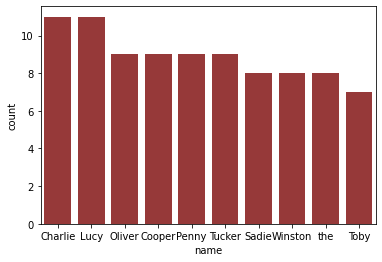

In [156]:
#find most popular dog names:
sb.countplot(data=dogs, x='name', order=dogs.name.value_counts().iloc[:10].index, color="brown");

#### Insight #1:The top 5 most popular dog names are:
> Charlie

> Lucy

> Oliver

> Cooper

> Penny

In [157]:
#create variable for each source
Iphone = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
Vine = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
Web = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
TweetDeck = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [158]:
#replace each source url with the type of source
dogs = dogs.replace(Iphone, 'Iphone')
dogs = dogs.replace(Vine, 'Vine')
dogs = dogs.replace(Web, 'Web')
dogs = dogs.replace(TweetDeck, 'TweetDeck')

In [160]:
#identify most tweet source:
dogs.source.value_counts()

Iphone           3623
Vine              136
Web                52
TweetDeck          20
 &amp; Titson       1
Name: source, dtype: int64

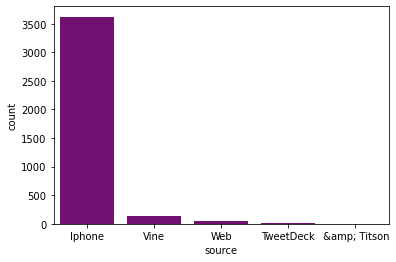

In [162]:
#plot most tweet source:
sb.countplot(data=dogs, x='source', order=dogs.source.value_counts().iloc[:5].index, color="purple");

#### Insight #2: Most of the tweets originated form an IPhone!

In [168]:
#identify which day has the most tweets
dogs.timestamp.value_counts()

2016-02-10 20:23:19 +0000    1
2016-09-03 16:04:27 +0000    1
2015-12-22 02:52:45 +0000    1
2015-12-02 21:45:16 +0000    1
2015-11-27 17:17:44 +0000    1
2015-11-24 01:11:27 +0000    1
2017-01-27 00:24:48 +0000    1
2016-02-12 17:22:12 +0000    1
2016-01-29 15:36:45 +0000    1
2017-04-07 16:10:12 +0000    1
2015-12-20 03:58:55 +0000    1
2016-03-02 16:23:36 +0000    1
2016-09-07 15:44:53 +0000    1
2017-01-06 17:33:29 +0000    1
2017-06-19 16:24:33 +0000    1
2017-06-02 15:00:16 +0000    1
2016-01-19 03:10:43 +0000    1
2016-05-09 00:11:16 +0000    1
2017-06-17 16:52:05 +0000    1
2016-09-01 00:04:38 +0000    1
2017-03-18 22:59:54 +0000    1
2015-11-28 18:19:37 +0000    1
2016-06-09 00:19:04 +0000    1
2016-11-28 16:37:19 +0000    1
2016-10-18 16:11:17 +0000    1
2016-02-19 21:39:54 +0000    1
2017-06-28 00:42:13 +0000    1
2016-02-08 17:17:22 +0000    1
2016-07-29 02:40:28 +0000    1
2015-12-01 20:35:22 +0000    1
2017-04-17 00:03:50 +0000    1
2015-11-20 00:40:05 +0000    1
2016-02-

#### Insight #3: There was only one WeRateDogs tweet each day!

In [169]:
#getting stats for favorite count
dogs.favorite_count.describe()

count      2329.000000
mean       7275.586947
std       11316.606720
min           0.000000
25%        1262.000000
50%        3159.000000
75%        8908.000000
max      150187.000000
Name: favorite_count, dtype: float64

In [170]:
#top 5 most rated tweets
dogs.query('favorite_count > 80000')

tweet_id timestamp  source text  rating_numerator  \
1631  879415818425184262       NaN  Iphone  NaN               NaN   
1695  866450705531457537       NaN  Iphone  NaN               NaN   
1728  859196978902773760       NaN  Iphone  NaN               NaN   
1963  822872901745569793       NaN  Iphone  NaN               NaN   
1999  819004803107983360       NaN  Iphone  NaN               NaN   
2083  807106840509214720       NaN  Iphone  NaN               NaN   
2581  744234799360020481       NaN  Iphone  NaN               NaN   
2621  739238157791694849       NaN  Iphone  NaN               NaN   

      rating_denominator name dog_type                 created_at  \
1631                 NaN  NaN      NaN  2017-06-26 19:07:24+00:00   
1695                 NaN  NaN      NaN  2017-05-22 00:28:40+00:00   
1728                 NaN  NaN      NaN  2017-05-02 00:04:57+00:00   
1963                 NaN  NaN      NaN  2017-01-21 18:26:02+00:00   
1999                 NaN  NaN      NaN  2017-01-11 02:15:36+00:00   
2083                 NaN  NaN      NaN  2016-12-09 06:17:20+00:00   
2581                 NaN  NaN      NaN  2016-06-18 18:26:18+00:00   
2621                 NaN  NaN      NaN  2016-06-04 23:31:25+00:00   

            id_str  ... favorited retweeted possibly_sensitive  \
1631  8.794158e+17  ...     False     False                0.0   
1695  8.664507e+17  ...     False     False                0.0   
1728  8.591970e+17  ...     False     False                0.0   
1963  8.228729e+17  ...     False     False                0.0   
1999  8.190048e+17  ...     False     False                0.0   
2083  8.071068e+17  ...     False     False                0.0   
2581  7.442348e+17  ...     False     False                0.0   
2621  7.392382e+17  ...     False     False                0.0   

     possibly_sensitive_appealable lang jpg_url img_num  p1  p1_conf p1_dog  
1631                           0.0   en     NaN     NaN NaN      NaN    NaN  
1695                           0.0   en     NaN     NaN NaN      NaN    NaN  
1728                           0.0   en     NaN     NaN NaN      NaN    NaN  
1963                           0.0   en     NaN     NaN NaN      NaN    NaN  
1999                           0.0   en     NaN     NaN NaN      NaN    NaN  
2083                           0.0   en     NaN     NaN NaN      NaN    NaN  
2581                           0.0   en     NaN     NaN NaN      NaN    NaN  
2621                           0.0   en     NaN     NaN NaN      NaN    NaN  

[8 rows x 29 columns]

In [171]:
#find the dog breed with most favorites
images.query('tweet_id == 879415818425184262')

tweet_id                                            jpg_url  \
2014  879415818425184262  https://pbs.twimg.com/ext_tw_video_thumb/87941...   

      img_num                p1   p1_conf  p1_dog           p2   p2_conf  \
2014        1  English_springer  0.383404    True  Boston_bull  0.134967   

      p2_dog        p3   p3_conf  p3_dog  
2014    True  Cardigan  0.110481    True

> The tweet with an English Springer Spaniel is the dog breed with the most favorites

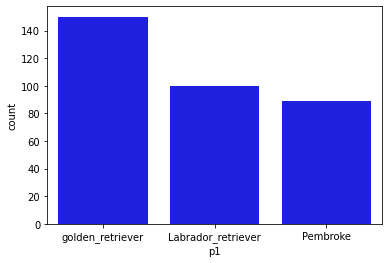

In [178]:
#most popular dog breeds
sb.countplot(data=images, x='p1', order=images.p1.value_counts().iloc[:3].index, color="blue");

> Top three most popular dog breeds are: Golden Retriever, Labrador Retriever and Pembroke Welsh Corgi